# Projet Netflix Data Analysis

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
data= pd.read_csv("netflix_titles.csv")

In [12]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
naPercent=(data.isna().sum())*100/len(data)
naPercent.sort_values()

show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
duration         0.034064
rating           0.045418
date_added       0.113546
cast             9.367549
country          9.435676
director        29.908028
dtype: float64

In [25]:
#compter le nombre de série
movie=data[data['type']=='Movie']
print("Le nombre de film est : ", movie.shape[0])

#compter le nombre de série
serie=data[data['type']=='TV Show']
print("Le nombre de série  est : ", serie.shape[0])

Le nombre de film est :  6131
Le nombre de série  est :  2676


In [35]:
#Même application en utilisant "" GROUPBY ""

regroupement=data.groupby('type').size().reset_index()
regroupement.columns=["type", "Nombre"]                     # Renommé les index de colones
regroupement

,type,Nombre
0,Movie,6131
1,TV Show,2676


In [51]:
#Pays ayant le plus de titre

classement =data['country'].value_counts()
print(classement.max())
print(classement.idxmax())

2818
United States


<Axes: xlabel='type', ylabel='Nombre'>

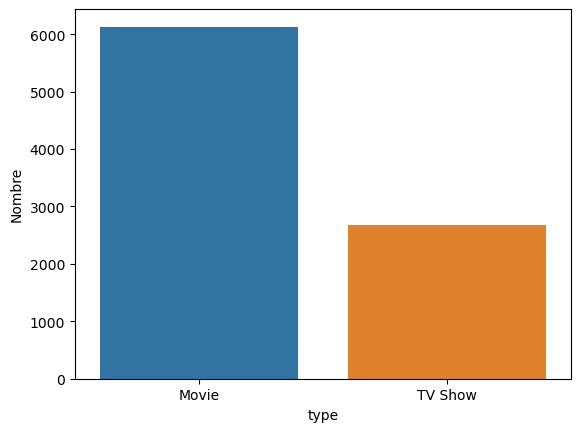

In [53]:
#Tracez un diagramme en barres pour représenter le nombre
#de films et de séries disponibles.

sn.barplot(data=regroupement, x='type', y='Nombre')

In [58]:
#Nombre de titre dans chaque catégorie

categorie= data['listed_in']                          #Récupération de colone contenant le différente catégorie
categorie_sep=categorie.str.split(', ').explode()     #Convertir les valeurs en chaine de caractere afin d'extraire les modalités
categorie_sep.value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

In [68]:
#Graphique 

data['date_added']=pd.to_datetime(data['date_added'])                #Transformation de Date en datetime (objet date manipulable par ppython)
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month



In [69]:
titreParMois= data.groupby(['year_added','month_added']).size().reset_index(name='nombre')
titreParMois

,year_added,month_added,nombre
0,2008.0,1.0,1
1,2008.0,2.0,1
2,2009.0,5.0,1
3,2009.0,11.0,1
4,2010.0,11.0,1
...,...,...,...
103,2021.0,5.0,132
104,2021.0,6.0,207
105,2021.0,7.0,257
106,2021.0,8.0,178


<Axes: xlabel='date', ylabel='nombre'>

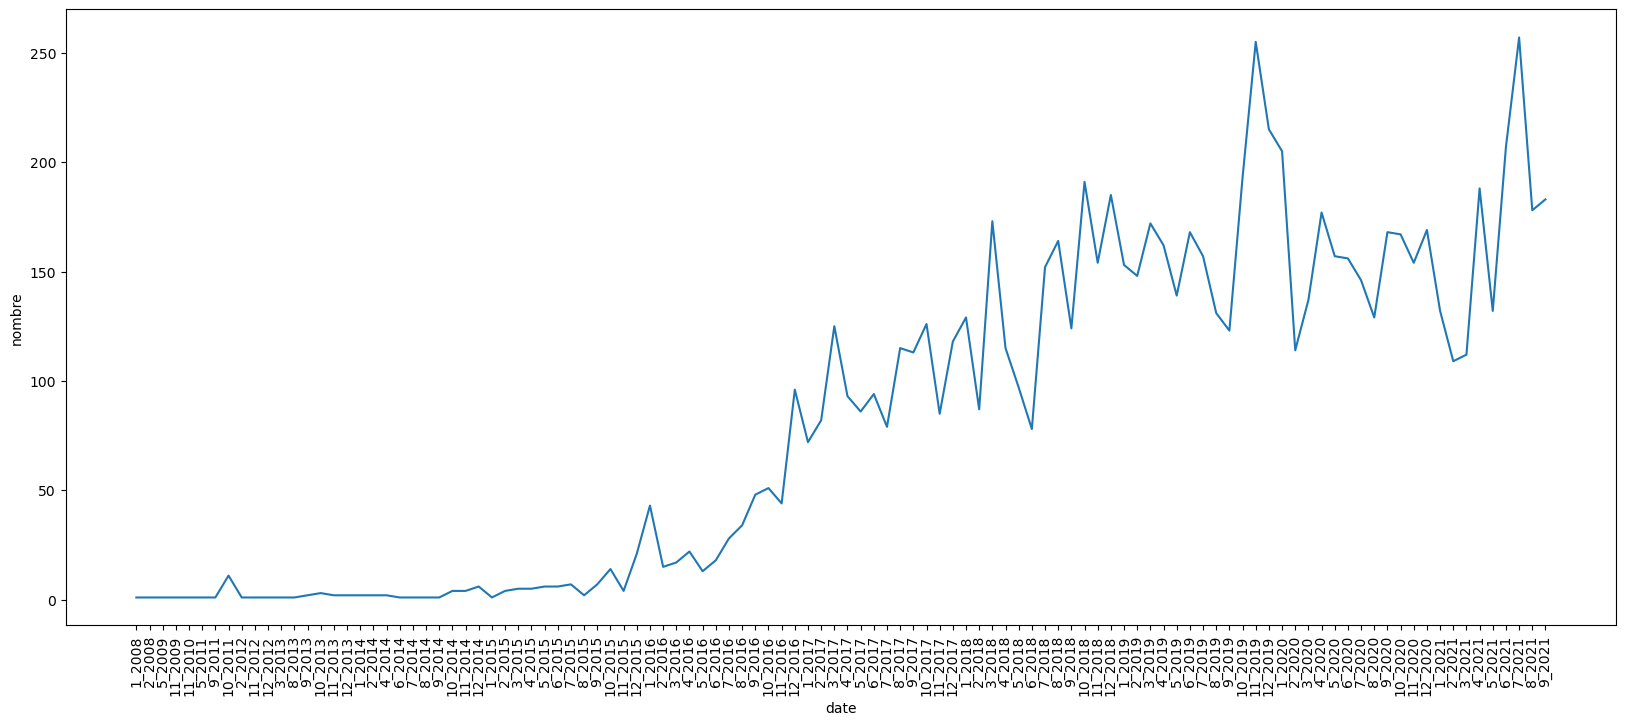

In [87]:
titreParMois['date']=titreParMois['month_added'].astype(int).astype(str) +'_'+  titreParMois['year_added'].astype(int).astype(str)
titreParMois


plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
sn.lineplot(data=titreParMois, x= 'date', y='nombre')
